<h1>K - means clustering </h1>

In [2]:
#importing lib.
import matplotlib.pyplot as plt
import numpy as np


#importing data
from keras.datasets import mnist


#importing k menas form sklearn


from sklearn.cluster import KMeans




Using TensorFlow backend.


In [0]:
#simple eq of k-means
# breaking down different paramters

'''
class sklearn.cluster.KMeans(n_clusters=8, 
                             init=’k-means++’, 
                             n_init=10, 
                             max_iter=300, 
                             tol=0.0001, 
                             precompute_distances=’auto’, 
                             verbose=0, 
                             random_state=None, 
                             copy_x=True,
                             n_jobs=None, 
                             algorithm=’auto’)



n_clusters : no. of clusters and diffult is 8

init : parameter to select d centroids .
       Methods :
       k-means++  := uses a smart way to select centroids

       random := selects centroids randomly form d data
       
       if ndarray is passed gives shape of (n_clusers ,n_features)

       defaults = k-means++
                   
n_init : no. of times k-means algoithem will run with diffent cenrpid seed
       
         default = 10

labels: labels of each poit

random_state : int, RandomState instance or None (default)
Determines random number generation for centroid initialization. 
Use an int to make the randomness deterministic.

'''

'\nclass sklearn.cluster.KMeans(n_clusters=8, \n                             init=’k-means++’, \n                             n_init=10, \n                             max_iter=300, \n                             tol=0.0001, \n                             precompute_distances=’auto’, \n                             verbose=0, \n                             random_state=None, \n                             copy_x=True,\n                             n_jobs=None, \n                             algorithm=’auto’)\n\n\n\nn_clusters : no. of clusters and diffult is 8\n\ninit : parameter to select d centroids .\n       Methods :\n       k-means++  := uses a smart way to select centroids\n\n       random := selects centroids randomly form d data\n       \n       if ndarray is passed gives shape of (n_clusers ,n_features)\n\n       defaults = k-means++\n                   \nn_init : no. of times k-means algoithem will run with diffent cenrpid seed\n       \n         default = 10\n\nlabels: labels

(300, 2)
[[ 0.42857674  4.9739971 ]
 [ 1.61990909  0.06764529]
 [ 1.43289271  4.37679234]
 [-1.57846247  3.03445802]
 [-1.65862863  2.26746029]]
labels [0 1 0 2 2]
centroids [[ 0.95625704  4.37226546]
 [ 1.95159369  0.83467497]
 [-1.60811992  2.85881658]]


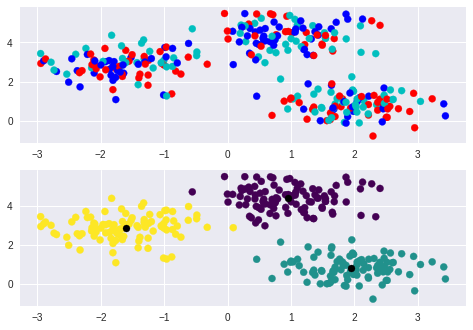

In [0]:
from sklearn.datasets.samples_generator import make_blobs
data, y_true = make_blobs(n_samples=300, centers=3,
                       cluster_std=0.60, random_state=0)



plt.subplot(2,1,1)
plt.scatter(data[:, 0], data[:, 1],c = ['c','r','b'])

#applying kmeans


k = KMeans(n_clusters = 3)
k.fit(data)

y_k = k.predict(data)
plt.subplot(2,1,2)
plt.scatter(data[:, 0], data[:, 1], c=k.labels_, s=50, cmap='viridis')


#visualize the data
print(data.shape)
print(data[0:5]) # 2 features to plot on in col 1 and 2
print("labels {}".format (y_k[0:5]))
print("centroids {}".format(k.cluster_centers_))

plt.scatter(k.cluster_centers_[:,0],k.cluster_centers_[:,1],c='black')



<h3>k-means is limited to linear cluster boundaries</h3>

The fundamental model assumptions of k-means (points will be closer to their own cluster center than to others) means that the algorithm will often be ineffective if the clusters have complicated geometries.

In particular, the boundaries between k-means clusters will always be linear, which means that it will fail for more complicated boundaries. Consider the following data, along with the cluster labels found by the typical k-means approach:




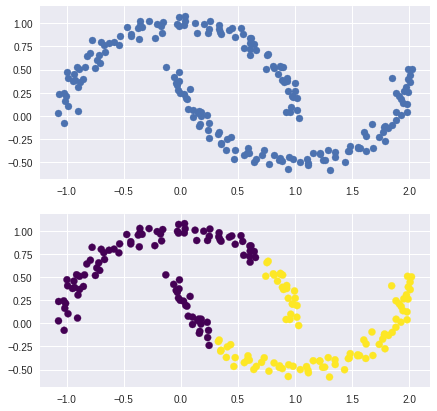

In [0]:
from sklearn.datasets import make_moons
data,labels = make_moons(200,noise = 0.05,random_state = 0)

plt.figure(figsize = (7,7))
plt.subplot(2,1,1)
plt.scatter(data[:,0],data[:,1])
plt.subplot(2,1,2)
labels = KMeans(2, random_state=0).fit_predict(data)
plt.scatter(data[:, 0], data[:, 1], c=labels,s=50, cmap='viridis');




/usr/local/lib/python3.6/dist-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


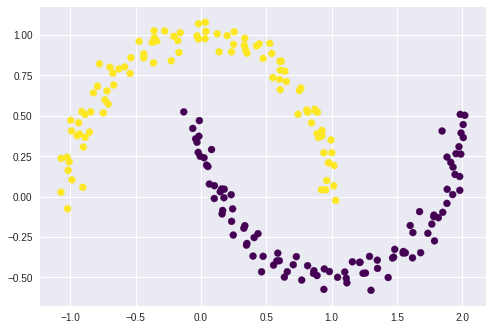

In [0]:
from sklearn.cluster import SpectralClustering

model = SpectralClustering(n_clusters = 2,
                          affinity = 'nearest_neighbors',
                          assign_labels = 'kmeans')

labels = model.fit_predict(data)

plt.scatter(data[:,0],data[:,1],c=labels , cmap = 'viridis')



# k-means on digits
Here we will attempt to use k-means to try to identify similar digits without using the original label information; this might be similar to a first step in extracting meaning from a new dataset about which you don't have any a priori label information.

We will start by loading the digits and then finding the KMeans clusters. Recall that the digits consist of 1,797 samples with 64 features, where each of the 64 features is the brightness of one pixel in an 8×8 image:

(10, 64)


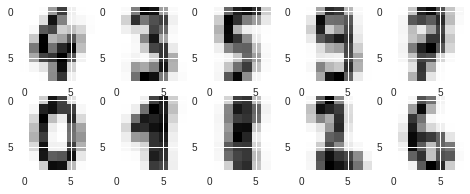

In [0]:
from sklearn.datasets import load_digits

digits = load_digits()

# digits.data.shape # 8 * 8 images  

k_digits = KMeans(n_clusters = 10,random_state = 0)
k_digits.fit(digits.data)


fig,a = plt.subplots(2,5,figsize = (8,3))
print( k_digits.cluster_centers_.shape)
centers = k_digits.cluster_centers_.reshape(10,8,8)

for i,j in enumerate(a.flat):
   j.imshow(centers[i])

    
    
clusters = k_digits.predict(digits.data)    




23.28491620111747


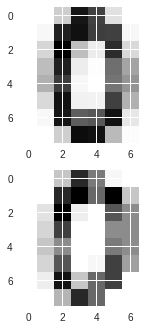

In [0]:

i = 0

a = k_digits.predict(digits.data[i].reshape(1,64))
plt.subplot(2,1,1)
plt.imshow(centers[a].reshape(8,8))
plt.subplot(2,1,2)
plt.imshow(digits.data[i].reshape(8,8))




different predicted labes  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
predicted labels {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
targets labels [0 1 2 3 4 5 6 7 8 9 0]
predicted labels [5 7 7 1 0 3 9 4 3 3 5]


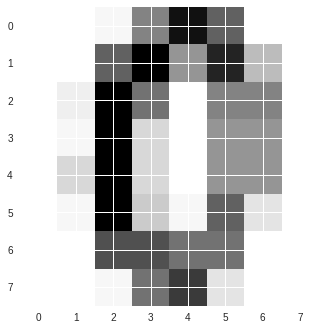

In [0]:
# some unwanted 
print("different predicted labes  {}".format(set(k_digits.labels_)))
print("predicted labels {}".format(set(clusters)))


print("targets labels {}".format(digits.target[0:11]))
plt.imshow(digits.data[10].reshape(8,8))
print("predicted labels {}".format(k_digits.labels_[0:11]))





#  k-means knows nothing about the identity of the cluster, the 0–9 labels may be permuted. We can fix this by matching each learned cluster label with the true labels found in them:

In [0]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]
    
# printing labels and target and clusters


print("order of label{}".format(labels[0:10]))
print("order of target{}".format(digits.target[0:10]))
print("order of predictions{}".format(clusters[0:10]))
    
    

from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)


order of label[0 8 8 3 4 9 6 7 9 9]
order of target[0 1 2 3 4 5 6 7 8 9]
order of predictions[5 7 7 1 0 3 9 4 3 3]


0.7935447968836951

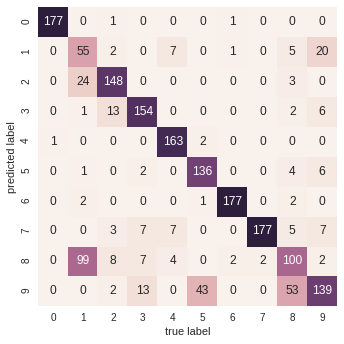

In [0]:
# lib for heat map
!pip install seaborn
import seaborn as sns; sns.set()  # for plot styling
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');


In [0]:
# t -sne t-distributed stocastic neighbou embedding (t_SNE)
#link :::https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.10-Manifold-Learning.ipynb

from sklearn.manifold import TSNE

# Project the data: this step will take several seconds
tsne = TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(digits.data)

# Compute the clusters
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

# Permute the labels
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# Compute the accuracy
accuracy_score(digits.target, labels)





0.9326655537006121

#  k-means for color compression

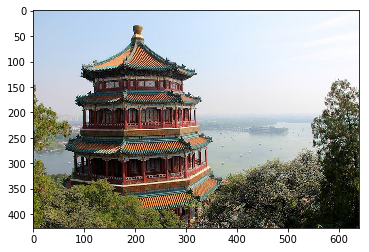

In [3]:
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
plt.imshow(china)

In [0]:
china.shape

(427, 640, 3)

In [0]:
#normalising the data

data = china / 255.0 # use 0...1 scale
# reshape data into [n_samples * n_features] 
data = data.reshape(427 * 640, 3)
data.shape


'''
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

'''




"\ndef plot_pixels(data, title, colors=None, N=10000):\n    if colors is None:\n        colors = data\n    \n    # choose a random subset\n    rng = np.random.RandomState(0)\n    i = rng.permutation(data.shape[0])[:N]\n    colors = colors[i]\n    R, G, B = data[i].T\n    \n    fig, ax = plt.subplots(1, 2, figsize=(16, 6))\n    ax[0].scatter(R, G, color=colors, marker='.')\n    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))\n\n    ax[1].scatter(R, B, color=colors, marker='.')\n    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))\n\n    fig.suptitle(title, size=20);\n\n"

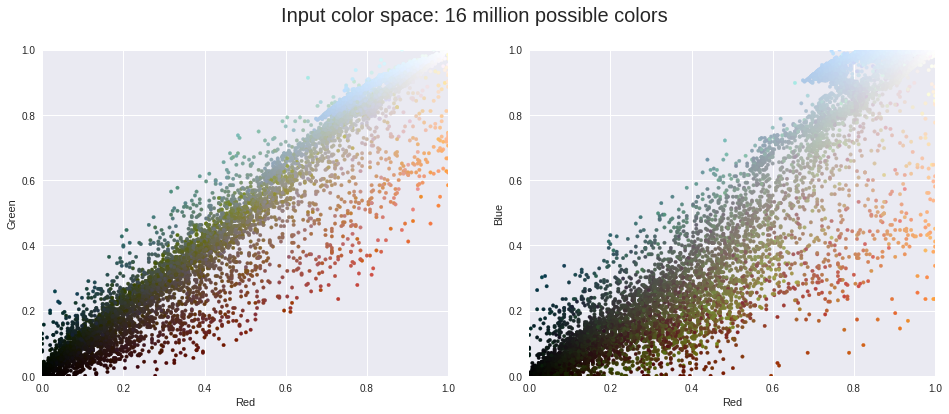

In [0]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);
    
    
plot_pixels(data, title='Input color space: 16 million possible colors')        

<h3>Now let's reduce these 16 million colors to just 16 colors, using a *k*-means clustering across the pixel space.
Because we are dealing with a very large dataset, we will use the mini batch *k*-means, which operates on subsets of the data to compute the result much more quickly than the standard *k*-means algorithm:</h3>

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=16,
        n_init=3, random_state=None, reassignment_ratio=0.01, tol=0.0,
        verbose=0)

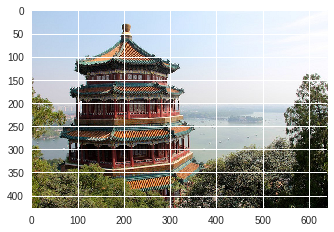

In [0]:
from sklearn.cluster import MiniBatchKMeans

plt.figure(figsize = (8,8))
plt.subplot(2,1,1)
plt.imshow(china)

# using normalized data
Kmeans = MiniBatchKMeans(16)
Kmeans.fit(data)



(16, 3)
[0 0 0 ... 1 5 5]


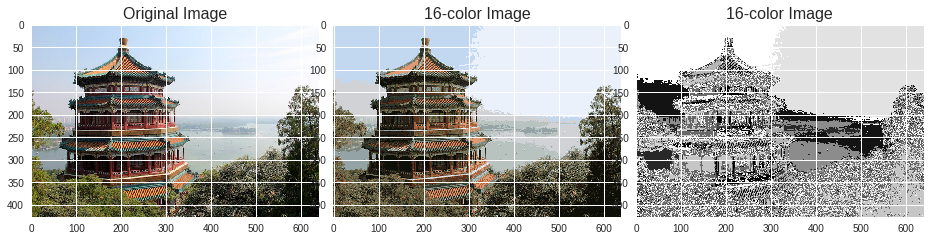

In [0]:
print(Kmeans.cluster_centers_.shape)
print(Kmeans.labels_)
new_china_black_white = Kmeans.predict(data).reshape(427,640)
new_china_cloured = Kmeans.cluster_centers_[Kmeans.predict(data)].reshape(427,640,3)


fig, ax = plt.subplots(1, 3, figsize=(16, 6))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(new_china_cloured)
ax[1].set_title('16-color Image', size=16);
ax[2].imshow(new_china_black_white)
ax[2].set_title('16-color Image', size=16);



In [0]:



kmeans2 = KMeans(n_clusters = 40,random_state = 0)
kmeans2.fit(data)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=40, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

(40, 3)
[ 8  8  8 ... 27 29 29]


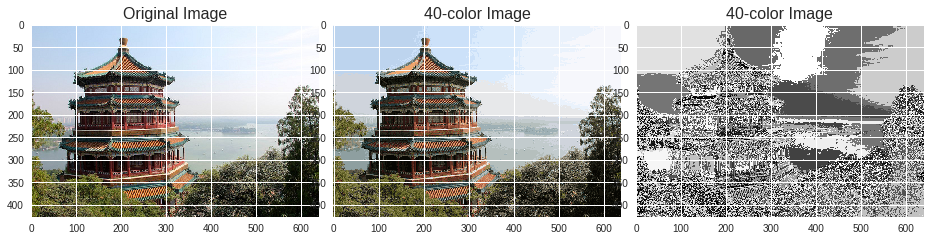

In [0]:
print(kmeans2.cluster_centers_.shape)
print(kmeans2.labels_)
new_china_black_white = kmeans2.predict(data).reshape(427,640)
new_china_cloured = kmeans2.cluster_centers_[kmeans2.predict(data)].reshape(427,640,3)


fig, ax = plt.subplots(1, 3, figsize=(16, 6))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(new_china_cloured)
ax[1].set_title('40-color Image', size=16);
ax[2].imshow(new_china_black_white)
ax[2].set_title('40-color Image', size=16);


In [0]:
print(kmeans.cluster_centers_.shape)
print(kmeans.cluster_centers_.squeeze().shape)




(10, 2)
(10, 2)


In [0]:
# importing 


from scipy.misc import face

face = face(gray = True)

data = face.reshape((-1, 1))
k_means = KMeans(n_clusters= 16, n_init=4 , random_state = 0)
k_means.fit(data)
values = k_means.cluster_centers_.squeeze()
labels = k_means.labels_

# create an array from labels and values
face_compressed = np.choose(labels, values)


labels :{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}
centroids:{33.12971598130284, 161.91374153940183, 65.11003056406304, 226.02971768201834, 133.9210816603131, 101.01486648852799, 77.67777452784948, 206.75082594330433, 15.462280356466337, 176.77390680207844, 111.51157347720127, 50.97639225180655, 147.32977015924925, 89.54119467217281, 122.00510851184445, 191.68753002834447}
(768, 1024)
(786432,)


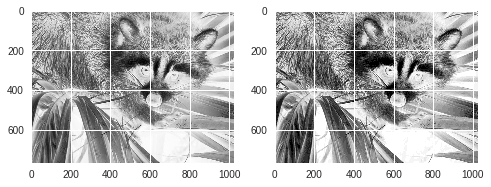

In [0]:
print("labels :{}".format(set(labels)))
print("centroids:{}".format(set(values)))

plt.subplot(1,2,1)
plt.imshow(face)
print(face.shape)
print(face_compressed.shape)
plt.subplot(1,2,2)
plt.imshow(face_compressed.reshape(face.shape[0],face.shape[1]))











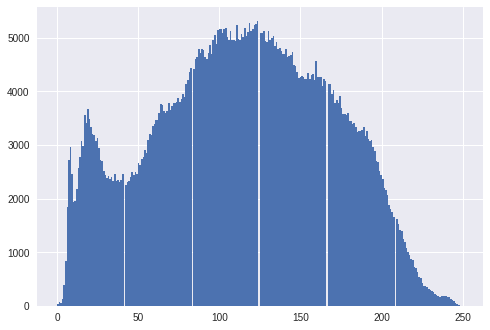

In [0]:
plt.hist(data,bins = 256)
plt.show()

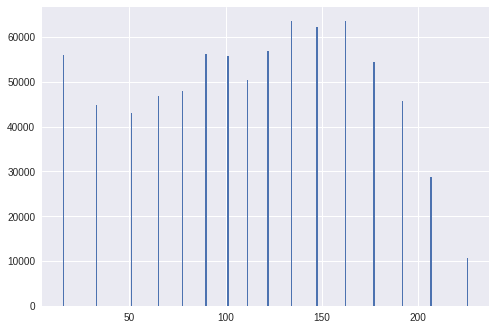

In [0]:
plt.hist(face_compressed.reshape(-1,1),bins = 256)
plt.show()

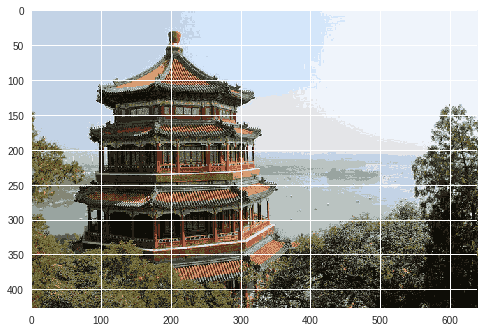

In [0]:
k_means3 = KMeans(n_clusters = 16,n_init = 4 ,random_state = 0)
k_means3.fit(china.reshape(427*640,3)/256)
labels = k_means3.predict(china.reshape(427*640,3)/256)
image = k_means3.cluster_centers_[labels]

image.shape
plt.imshow(image.reshape(427 , 640, 3))

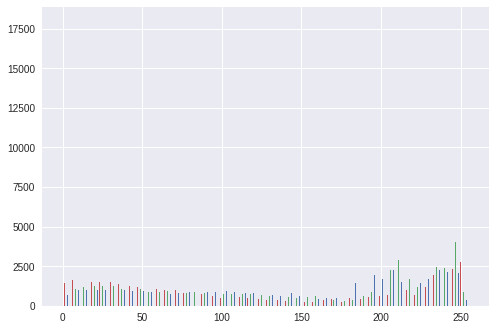

In [0]:
plt.hist(china.reshape(-1,3),bins = 256 *3)
plt.show()

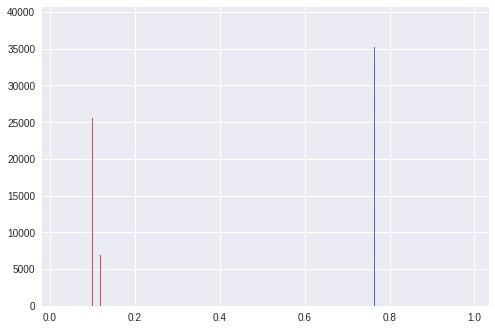

In [0]:
plt.hist(image.reshape(-1,3),bins = 256*3)
plt.show()